In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
#Leer el documento con ayuda de la funcion read_csv
df = pd.read_csv("arizpe.txt", sep="\s+", skiprows=20,  engine='python',names=['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'])

In [142]:
#Convertir a variable de tipo fecha 
df['Fecha'] = pd.to_datetime (df['Fecha'])
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year
df["Dia"] = df["Fecha"].dt.day
#Convertir las demas variables a tipo float
df[['Precip','Evap','Tmax','Tmin']] = df[['Precip','Evap','Tmax','Tmin']].apply(pd.to_numeric, errors='coerce')

In [143]:
#Establecer una variable con los meses 
Meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
#Calcular el promedio mensual de lluvia de todos los años , en mi caso mi lista de datos contiene 42 años.
acum = []
total = 0
for j in range(1,13):
    for i in range (0,len(df)):
        if (df["Mes"][i] == j):
            total = total + df["Precip"][i]
    total = total/27
    acum.append(total)
    total = 0


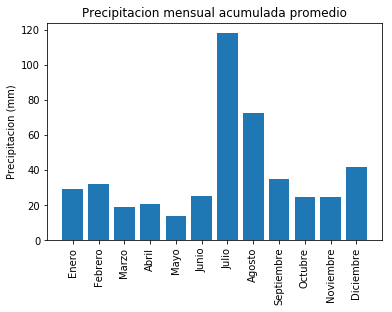

In [144]:
plt.bar(np.arange(12),acum)
plt.title("Precipitacion mensual acumulada promedio")
plt.ylabel("Precipitacion (mm)")
plt.xticks(np.arange(12), Meses, rotation = 90)
plt.show()

In [145]:
#Establecer una variable con los meses 
Meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
#Calcular el promedio mensual de lluvia de todos los años , en mi caso mi lista de datos contiene 42 años.
an = []
total = 0
c = 0
for j in range(1961,1989):
    for i in range (0,len(df)):
        if (df["Año"][i] == j):
            total = total + df["Precip"][i]
    an.append(total)
    total = 0


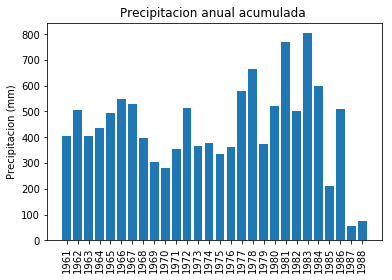

In [146]:
plt.bar(np.arange(28),an)
plt.title("Precipitacion anual acumulada ")
plt.ylabel("Precipitacion (mm)")
plt.xticks(np.arange(28), range(1961,1989), rotation = 90)
plt.show()

In [147]:
tmax = []
n = 0
for i in range(1,13):
    for j in range(1961,1989):
        for k in range(0,len(df)):
            if(df["Mes"][k] == i and df["Año"][k] == j):
                n = n+1
                suma = suma + df["Tmax"][k]
        suma = suma/n
        tmax.append(suma)
        suma = 0
        n = 0

tmin = []
n = 0
for i in range(1,13):
    for j in range(1961,1989):
        for k in range(0,len(df)):
            if(df["Mes"][k] == i and df["Año"][k] == j):
                n = n+1
                suma = suma + df["Tmin"][k]
        suma = suma/n
        tmin.append(suma)
        suma = 0
        n = 0

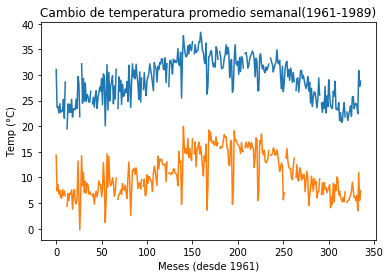

In [180]:
df1 = pd.DataFrame({"Tmax" : tmax,
                 "Tmin" : tmin
                    }, index = range(0,len(tmax))
    )

temps = df1[["Tmax","Tmin"]]
plt.plot(np.arange(len(tmin)),temps)
plt.title("Cambio de temperatura promedio semanal(1961-1989)")
plt.ylabel("Temp (°C)")
plt.xlabel("Meses (desde 1961)")
plt.show()

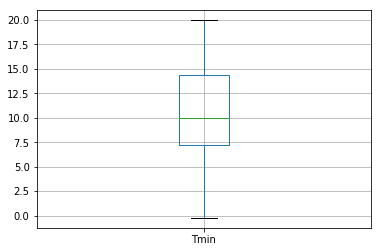

In [184]:
df1.boxplot("Tmin")

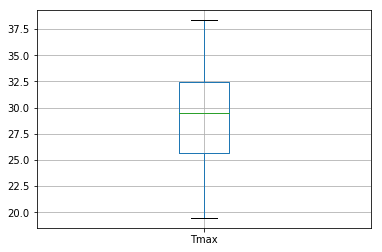

In [185]:
df1.boxplot("Tmax")

In [172]:
df["Tmed"] = (df["Tmax"]+df["Tmin"])/2

In [176]:
tmed = []
temper = []
for j in range(1961,1989):
    for i in range(0,len(df)):
        if(df["Año"][i] == j):
            temper.append(df["Tmed"][i])
    tmed.append(temper)
    temper = []